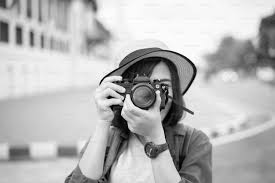

In [28]:
import numpy as np
import cv2
img=cv2.imread('/content/sample_gauss.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(img)


In [23]:
def create_gaussian_kernel(ksize, sigma):
  ax= np.arange(-(ksize //2), ksize // 2 + 1)
  xx, yy=np.meshgrid(ax, ax)
  kernel = np.exp(-(xx**2+ yy**2) / (2*sigma**2))
  kernel=kernel/np.sum(kernel)
  return kernel

[[2.30158674e-44 1.51122114e-36 1.81740102e-30 4.00309214e-26
  1.61496263e-23 1.19330495e-22 1.61496263e-23 4.00309214e-26
  1.81740102e-30 1.51122114e-36 2.30158674e-44]
 [1.51122114e-36 9.92267337e-29 1.19330495e-22 2.62842907e-18
  1.06038397e-15 7.83523662e-15 1.06038397e-15 2.62842907e-18
  1.19330495e-22 9.92267337e-29 1.51122114e-36]
 [1.81740102e-30 1.19330495e-22 1.43507365e-16 3.16096006e-12
  1.27522230e-09 9.42268913e-09 1.27522230e-09 3.16096006e-12
  1.43507365e-16 1.19330495e-22 1.81740102e-30]
 [4.00309214e-26 2.62842907e-18 3.16096006e-12 6.96247786e-08
  2.80886404e-05 2.07548540e-04 2.80886404e-05 6.96247786e-08
  3.16096006e-12 2.62842907e-18 4.00309214e-26]
 [1.61496263e-23 1.06038397e-15 1.27522230e-09 2.80886404e-05
  1.13317663e-02 8.37310570e-02 1.13317663e-02 2.80886404e-05
  1.27522230e-09 1.06038397e-15 1.61496263e-23]
 [1.19330495e-22 7.83523662e-15 9.42268913e-09 2.07548540e-04
  8.37310570e-02 6.18693477e-01 8.37310570e-02 2.07548540e-04
  9.42268913e-09

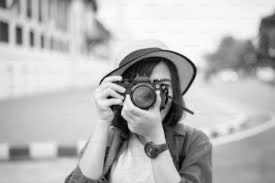

In [30]:
def apply_filter(img, kernel):
  ksize=kernel.shape[0]
  pad=ksize // 2
  padded_img = np.pad(img, pad_width=pad, mode='reflect')
  filtered_img = np.zeros_like(img)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      region=padded_img[i:i+ksize, j:j+ksize]
      filtered_img[i, j] = np.sum(region*kernel)

  return filtered_img

gauss_kernel = create_gaussian_kernel(ksize=11, sigma=0.5)
print(gauss_kernel)

result = apply_filter(img, gauss_kernel)

cv2_imshow(result)